<a href="https://colab.research.google.com/github/BeaverWorksMedlytics2020/Week2/blob/master/Notebooks/01_TimeSeries/TimeSeries_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Data Analysis
Let's revist the dataset utilized in the tutorial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io.wavfile
from IPython.display import Audio

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

Import the data and see what's in it (print the first 7 rows):

In [ ]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/multiTimeline.csv"
df = pd.read_csv(url,  skiprows=1)
df.head(7)


,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
5,2004-06,64,24,45
6,2004-07,60,23,44


What are your data types and how many rows do you have?:

Month = object, diet, gym, finance are all int. 168 rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


Change the dataframe index to be datetime type. Plot all columns the dataset:


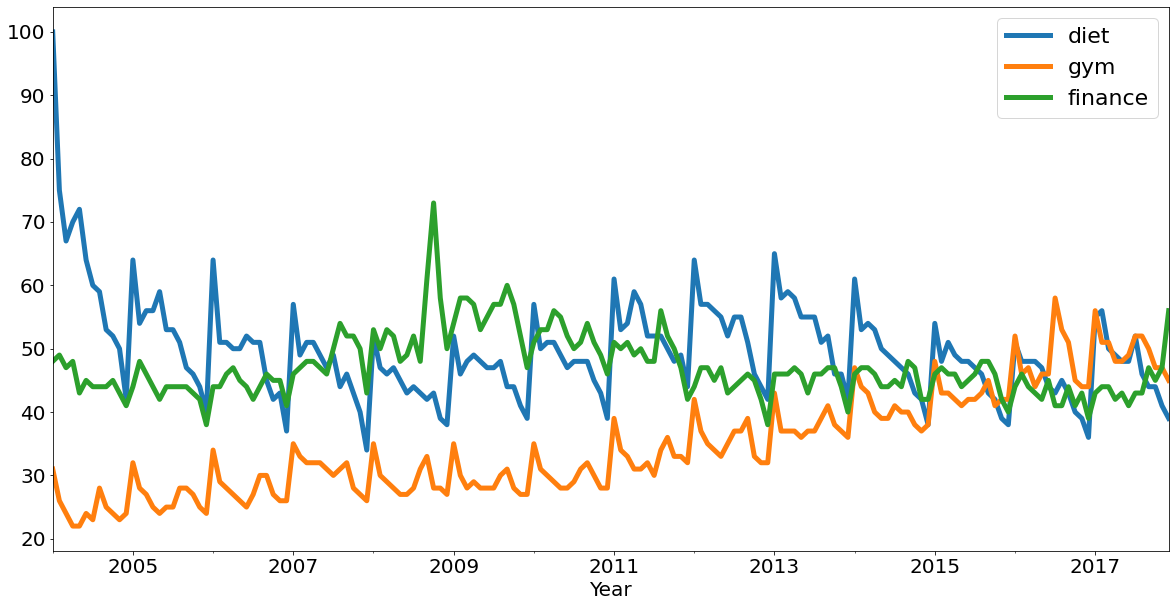

In [ ]:
#Write Code Here
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


Now let's plot the 'gym' and 'finance' columns as a time series.

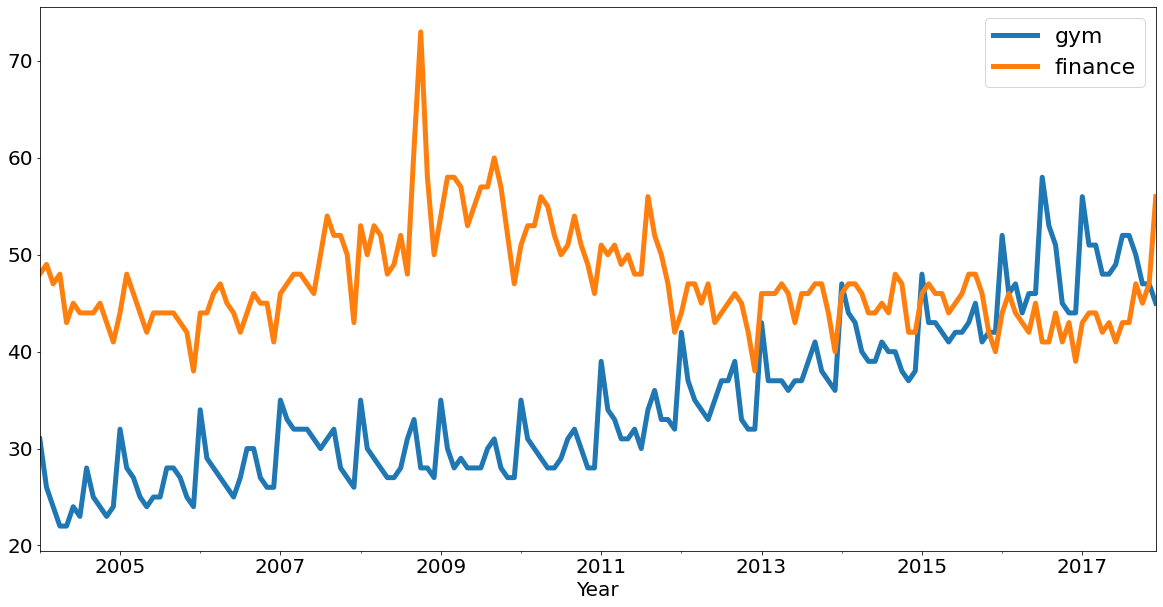

In [ ]:
df[['gym', 'finance']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Using a rolling window of appropriate size, identfy non-seasonal trends in each time series

Help on function pad in module numpy:

pad(array, pad_width, mode='constant', **kwargs)
    Pad an array.
    
    Parameters
    ----------
    array : array_like of rank N
        The array to pad.
    pad_width : {sequence, array_like, int}
        Number of values padded to the edges of each axis.
        ((before_1, after_1), ... (before_N, after_N)) unique pad widths
        for each axis.
        ((before, after),) yields same before and after pad for each axis.
        (pad,) or int is a shortcut for before = after = pad width for all
        axes.
    mode : str or function, optional
        One of the following string values or a user supplied function.
    
        'constant' (default)
            Pads with a constant value.
        'edge'
            Pads with the edge values of array.
        'linear_ramp'
            Pads with the linear ramp between end_value and the
            array edge value.
        'maximum'
            Pads with the maximum value of all or part of

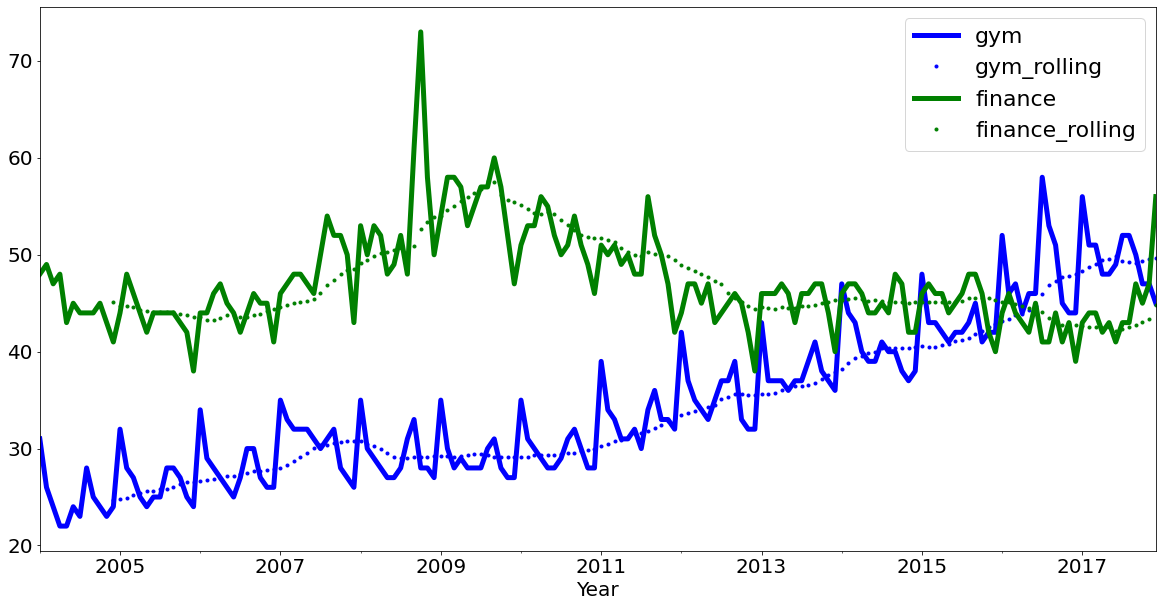

In [ ]:
gym = df[['gym']]
help(np.pad)
finance = df[['finance']]
window = 12


df_rm = pd.concat([gym, gym.rolling(window).mean(), finance, finance.rolling(window).mean()], axis=1)
ax = df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20, style= ['b', 'b.', 'g', 'g.'])
ax.legend(['gym', 'gym_rolling', 'finance', 'finance_rolling'])
plt.xlabel('Year', fontsize=20);

#It seems like the window is also 12 for the rolling average for both "gym" and "finance"


Using either the first order differencing or the additive model, identify seasonal patterns in the data.

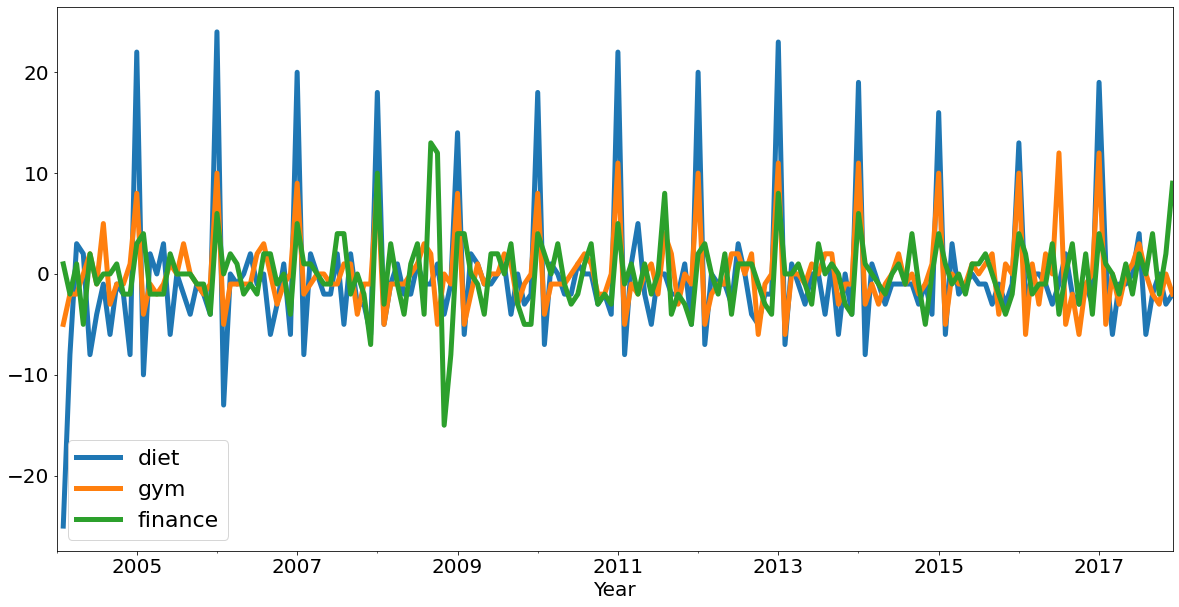

In [ ]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Representing Signals Data

What is the formula for this sinusoidal curve? 



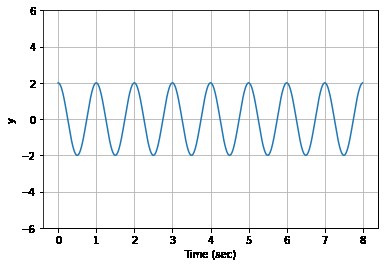

Can you reproduce the curve plot? (use np.sin, np.cos, and np.pi)

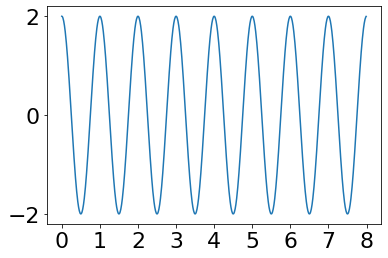

In [ ]:
n_sec = 8                         # number of seconds to plot
n_points = 100                  # number of points per second
t = np.arange(n_sec*n_points)/n_points    # time axis

#Write Code Here
plt.plot(t, 2*np.cos(2*np.pi*t))
plt.xticks(range(9))
plt.show()

### Approximating a Square Wave

As you've seen, we can create arbitrary signals by combining multiple sinusoid waves.  Let's practice approximating a square wave!

Using Fourier expansion, an ideal square wave with an amplitude of 1 can be represented as an infinite sum of sinusoidal waves:

See the Wikipedia article on the square wave (https://en.wikipedia.org/wiki/Square_wave) for the equation!
In the below code cell, try use the provided formula for the $k$th term in the expansion to calculate 5 and 20 term approximations for the square wave.

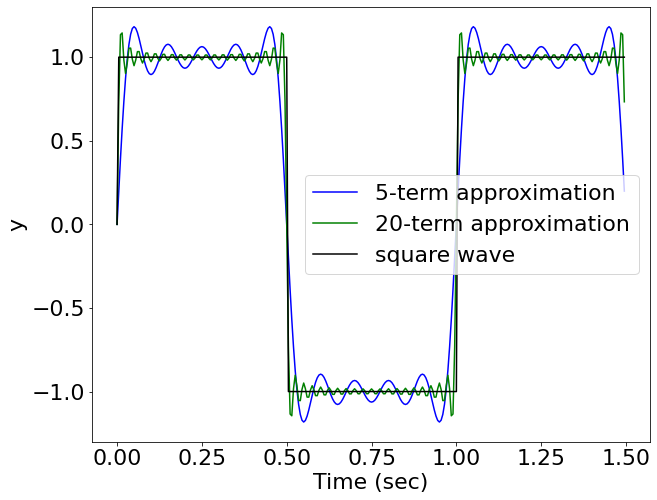

In [ ]:
#Write Code Here
# Setup
n_sec = 1.5                               # number of seconds to plot
n_points_per_sec = 200                    # number of points per second
t = np.arange(n_sec*n_points_per_sec)/n_points_per_sec    # time vector
f = 1             # define frequency for square wave to be approximated
n_signals = 5     # number of terms for first approximation
n_signals2 = 20   # number of terms for second approximation

# Populate y_approx1 and y_approx2 with approximations for square wave function
y_approx1= np.zeros(t.shape)
for k in range(1,6):
  omega = 2*np.pi*(2*k-1)*f
  y_approx1 += (4/np.pi) * np.sin(omega*t) / (2*k-1)


y_approx2 = np.zeros(t.shape)
for k in range(1,21):
  omega = 2*np.pi*(2*k-1)*f
  y_approx2 += (4/np.pi) * np.sin(omega*t) / (2*k-1)


# Plotting
sqwave = np.sign(np.sin(2*np.pi*t)) # an actual square wave (for reference)

plt.figure(figsize=(10,8))
plt.plot(t, y_approx1, label = f'{n_signals}-term approximation', color = 'b')
plt.plot(t, y_approx2, label = f'{n_signals2}-term approximation', color = 'g')
plt.plot(t,sqwave,label='square wave',color = 'k')

plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.legend()

Those little peaks near the corners are caused by what's known as the [Gibbs Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon). As long as we have a finite number of terms, no matter how many, we will have Gibbs phenomena.

# Fun With Sounds

The rest of this problem set notebook is purely for fun (i.e. no more questions.) 

Below, we use scipy tools to play sounds based on waveforms we define, or to display waveforms based on recorded audio files.

### Beats
If you combine two signals with very similar frequencies, you may induce *beats*.

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/beats.gif?raw=true">



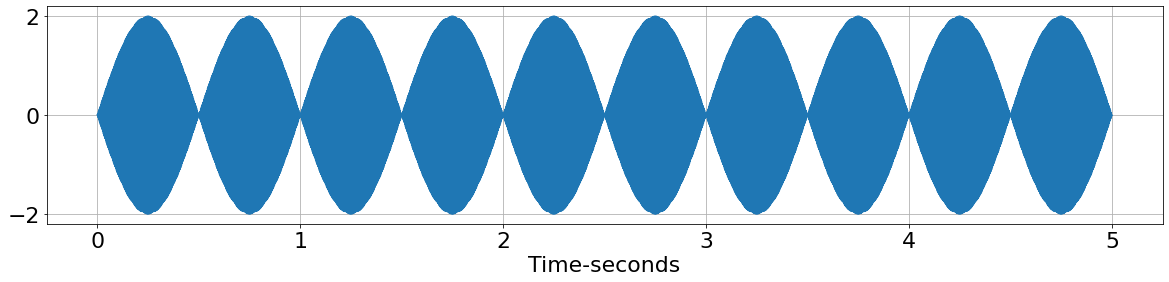

In [ ]:
f = 262                # base frequency (Hz)
f_diff = 2             # frequency difference (Hz)


n_sec = 5              # number of seconds
omega1 = 2*np.pi*f     # angular frequency (rad/sec)
omega2 = 2*np.pi*(f+f_diff)    

n_points = (f+f_diff)*n_sec*4   # number of points -- must be greater than (f+f_diff)*n_sec*2
t = np.arange(n_sec*n_points)/n_points    
y = np.sin(omega1*t) + np.sin(omega2*t+np.pi)  

plt.figure(figsize=(20,4))
plt.plot(t,y)
plt.xlabel('Time-seconds')
plt.grid(True)
Audio(data=y, rate=n_points)

#### Exercise

Let's play with more sounds.  Here is what "ah" sound looks like:

In [ ]:
# Grab 2 sample .wav files (audio files) to analyze
! wget https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/newt.wav
! wget https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/vowel_ah.wav


--2022-07-18 19:06:27--  https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/newt.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99852 (98K) [audio/wav]
Saving to: ‘newt.wav’

newt.wav            100%[===================>]  97.51K  --.-KB/s    in 0.002s  

2022-07-18 19:06:27 (39.5 MB/s) - ‘newt.wav’ saved [99852/99852]

--2022-07-18 19:06:28--  https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/sounds/vowel_ah.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

Text(0, 0.5, 'amplitude')

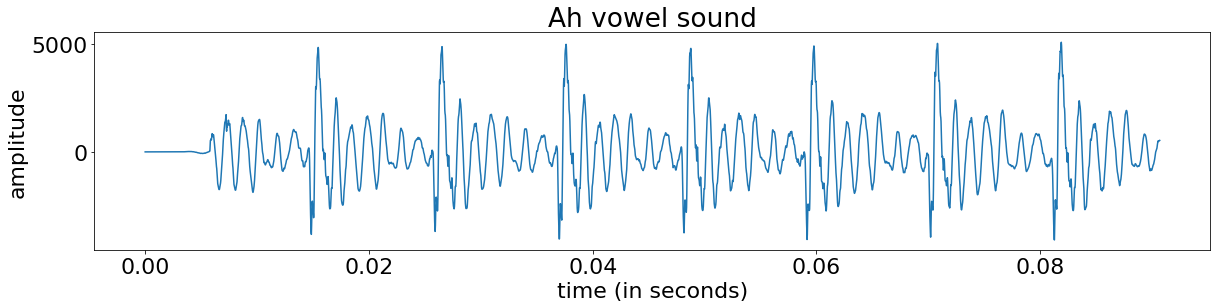

In [ ]:
(sample_rate, input_signal) = scipy.io.wavfile.read("./vowel_ah.wav")

t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

plt.figure(figsize=(20,4))
plt.plot(t[0:4000], input_signal[0:4000])
plt.title('Ah vowel sound')
plt.xlabel('time (in seconds)')
plt.ylabel('amplitude')

Now let's play the sound!

In [ ]:
# for reference, this is what it should sound like
Audio("./vowel_ah.wav")

Now It's your turn: input the audio file "./newt.wav", plot the figure appropriate to the length of the input signal and sample rate, and play it.

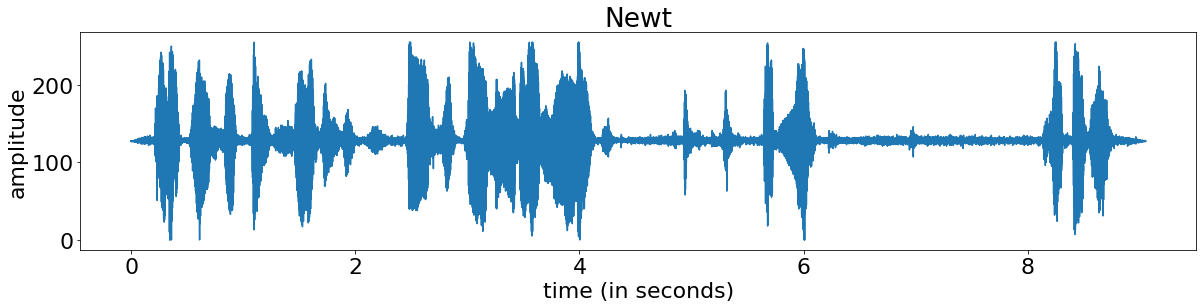

In [ ]:
#write code here
(sample_rate, input_signal) = scipy.io.wavfile.read("./newt.wav")

t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

plt.figure(figsize=(20,4))
plt.plot(t, input_signal)
plt.title('Newt')
plt.xlabel('time (in seconds)')
plt.ylabel('amplitude')

Audio(data=input_signal, rate=sample_rate)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7001b069-2e6b-4b2b-882f-4faa1fb4a139' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>